In [259]:
import pandas as pd

from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [260]:
cv = pd.read_csv("costumer_segmentation.csv")
cv.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4,Cat_6,A
2,459000,Male,Yes,59,No,Executive,11.0,High,2,Cat_6,B
3,459001,Female,No,19,No,Marketing,NaN,Low,4,Cat_6,A
4,459003,Male,Yes,47,Yes,Doctor,0.0,High,5,Cat_4,C


In [261]:
cv.drop(columns = ["ID", "Work_Experience", "Var_1"], inplace = True)
cv.dropna(inplace = True)
cv

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,Female,Yes,36,Yes,Engineer,Low,1,B
1,Male,Yes,37,Yes,Healthcare,Average,4,A
2,Male,Yes,59,No,Executive,High,2,B
3,Female,No,19,No,Marketing,Low,4,A
4,Male,Yes,47,Yes,Doctor,High,5,C
5,Male,Yes,61,Yes,Doctor,Low,3,D
6,Female,Yes,47,Yes,Artist,Average,3,D
7,Male,Yes,50,Yes,Artist,Average,4,B
8,Male,No,19,No,Healthcare,Low,4,B
9,Male,No,22,No,Healthcare,Low,3,D


In [262]:
le = preprocessing.LabelEncoder()
le.fit(cv["Gender"])
cv["Gender"] = le.transform(cv["Gender"])
gender_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(gender_labels)

{'Female': 0, 'Male': 1}


In [263]:
le.fit(cv["Ever_Married"])
cv["Ever_Married"] = le.transform(cv["Ever_Married"])
ever_married_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(ever_married_labels)

{'No': 0, 'Yes': 1}


In [264]:
le.fit(cv["Graduated"])
cv["Graduated"] = le.transform(cv["Graduated"])
graduated_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(graduated_labels)

{'No': 0, 'Yes': 1}


In [265]:
le.fit(cv["Profession"])
cv["Profession"] = le.transform(cv["Profession"])
profession_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(profession_labels)

{'Artist': 0, 'Doctor': 1, 'Engineer': 2, 'Executive': 3, 'Healthcare': 4, 'Lawyer': 5, 'Marketing': 6}


In [266]:
le.fit(cv["Spending_Score"])
cv["Spending_Score"] = le.transform(cv["Spending_Score"])
spending_score_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(spending_score_labels)

{'Average': 0, 'High': 1, 'Low': 2}


In [267]:
X = cv.iloc[:,:7]
X

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size
0,0,1,36,1,2,2,1
1,1,1,37,1,4,0,4
2,1,1,59,0,3,1,2
3,0,0,19,0,6,2,4
4,1,1,47,1,1,1,5
5,1,1,61,1,1,2,3
6,0,1,47,1,0,0,3
7,1,1,50,1,0,0,4
8,1,0,19,0,4,2,4
9,1,0,22,0,4,2,3


In [268]:
Y = cv.iloc[:,7]
Y

0     B
1     A
2     B
3     A
4     C
5     D
6     D
7     B
8     B
9     D
10    D
11    A
12    D
13    D
14    C
15    D
16    B
17    B
18    C
19    A
Name: Segmentation, dtype: object

In [269]:
#Filter Method -> Chi Square

bestfeatures = SelectKBest(score_func = chi2, k = 4)
fit = bestfeatures.fit(X,Y)
cvscores = pd.DataFrame(fit.scores_)
cvcolumns = pd.DataFrame(X.columns)

featureScore = pd.concat([cvcolumns, cvscores], axis = 1)
featureScore.columns = ["Attr", "Score"]
print(featureScore.nlargest(4,"Score"))

           Attr      Score
2           Age  59.167455
4    Profession   3.775076
6   Family_Size   2.339286
1  Ever_Married   1.289116


In [270]:
cv

,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Segmentation
0,0,1,36,1,2,2,1,B
1,1,1,37,1,4,0,4,A
2,1,1,59,0,3,1,2,B
3,0,0,19,0,6,2,4,A
4,1,1,47,1,1,1,5,C
5,1,1,61,1,1,2,3,D
6,0,1,47,1,0,0,3,D
7,1,1,50,1,0,0,4,B
8,1,0,19,0,4,2,4,B
9,1,0,22,0,4,2,3,D


In [271]:
cv.drop(columns = ["Spending_Score", "Graduated", "Gender"], inplace = True)
cv.dropna(inplace = True)
cv

,Ever_Married,Age,Profession,Family_Size,Segmentation
0,1,36,2,1,B
1,1,37,4,4,A
2,1,59,3,2,B
3,0,19,6,4,A
4,1,47,1,5,C
5,1,61,1,3,D
6,1,47,0,3,D
7,1,50,0,4,B
8,0,19,4,4,B
9,0,22,4,3,D


In [272]:
fitur = ["Ever_Married", "Age", "Profession", "Family_Size"]
i = cv[fitur]
j = cv["Segmentation"]

In [273]:
i

,Ever_Married,Age,Profession,Family_Size
0,1,36,2,1
1,1,37,4,4
2,1,59,3,2
3,0,19,6,4
4,1,47,1,5
5,1,61,1,3
6,1,47,0,3
7,1,50,0,4
8,0,19,4,4
9,0,22,4,3


In [274]:
j

0     B
1     A
2     B
3     A
4     C
5     D
6     D
7     B
8     B
9     D
10    D
11    A
12    D
13    D
14    C
15    D
16    B
17    B
18    C
19    A
Name: Segmentation, dtype: object

In [275]:
#Decision Tree Classification C4.5

clf = DecisionTreeClassifier(criterion = "entropy")

In [276]:
clf = clf.fit(i,j)

In [277]:
test_pred = clf.predict([[1,50,0,4]])
print("Predict Result : ", test_pred)

Predict Result :  ['B']


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


|--- Family_Size <= 2.50
|   |--- Age <= 60.00
|   |   |--- class: B
|   |--- Age >  60.00
|   |   |--- class: C
|--- Family_Size >  2.50
|   |--- Family_Size <= 3.50
|   |   |--- Age <= 62.00
|   |   |   |--- class: D
|   |   |--- Age >  62.00
|   |   |   |--- class: A
|   |--- Family_Size >  3.50
|   |   |--- Family_Size <= 5.50
|   |   |   |--- Age <= 42.00
|   |   |   |   |--- Ever_Married <= 0.50
|   |   |   |   |   |--- Profession <= 5.00
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- Profession >  5.00
|   |   |   |   |   |   |--- class: A
|   |   |   |   |--- Ever_Married >  0.50
|   |   |   |   |   |--- class: A
|   |   |   |--- Age >  42.00
|   |   |   |   |--- Profession <= 0.50
|   |   |   |   |   |--- Family_Size <= 4.50
|   |   |   |   |   |   |--- class: B
|   |   |   |   |   |--- Family_Size >  4.50
|   |   |   |   |   |   |--- class: A
|   |   |   |   |--- Profession >  0.50
|   |   |   |   |   |--- class: C
|   |   |--- Family_Size >  5.50
|   |   |   

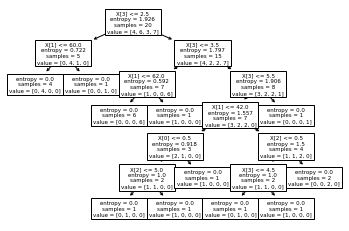

In [278]:
tree.plot_tree(clf.fit(i,j))
r = tree.export_text(clf, feature_names = fitur)
print(r)

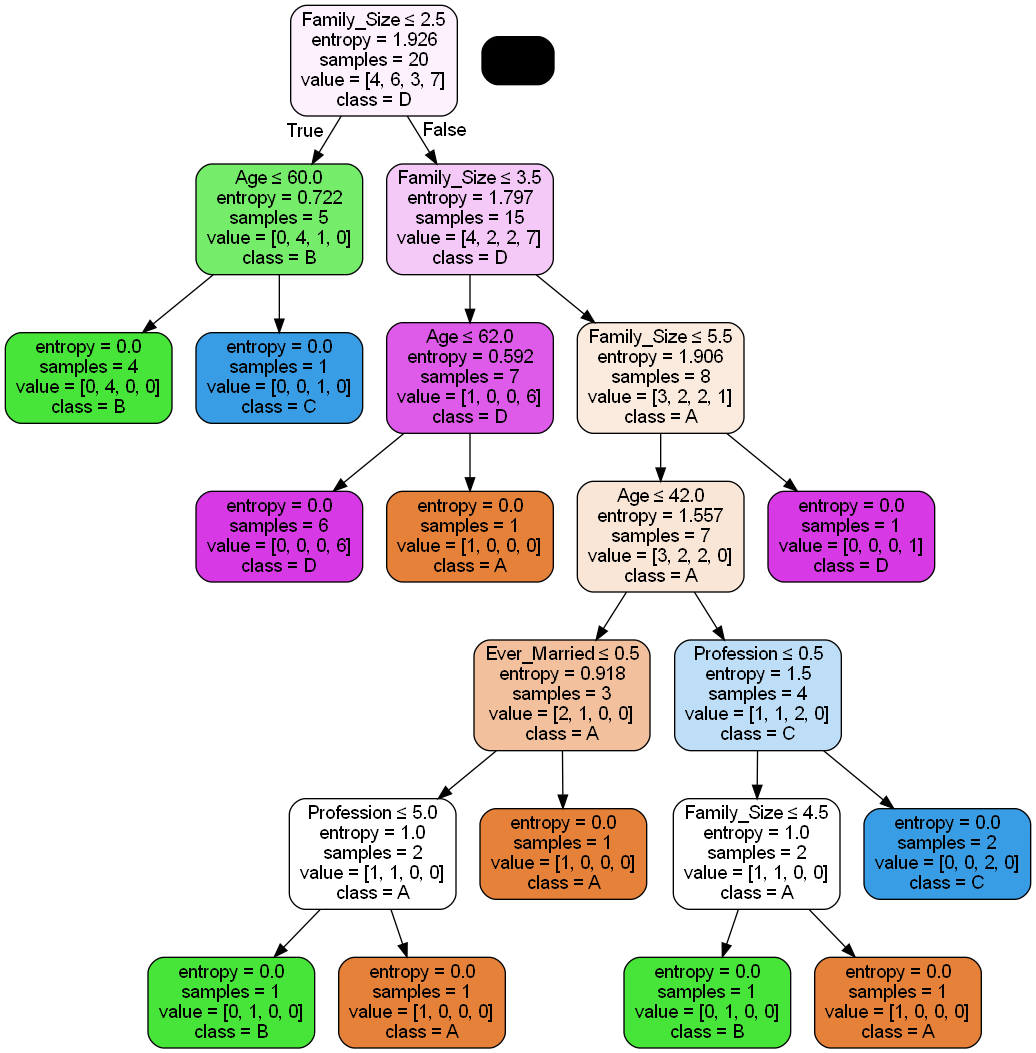

In [279]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True,
               feature_names = fitur, class_names = ["A", "B", "C", "D"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("D://segmentation.png")
Image("D://segmentation.png")

In [250]:
x_train, x_test, y_train, y_test = train_test_split(i,j, test_size = 0.2)
x_train

,Ever_Married,Age,Profession,Family_Size
0,1,36,2,1
11,1,50,0,5
17,1,55,0,1
4,1,47,1,5
6,1,47,0,3
8,0,19,4,4
16,1,45,0,2
2,1,59,3,2
12,0,27,4,3
3,0,19,6,4


In [251]:
y_train

0     B
11    A
17    B
4     C
6     D
8     B
16    B
2     B
12    D
3     A
13    D
14    C
18    C
19    A
15    D
1     A
Name: Segmentation, dtype: object

In [252]:
clf = SVC()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [253]:
print(accuracy_score(y_pred, y_test))

0.75
